In [1]:
import pandas as pd

df = pd.read_csv("..\\data\\column_3C_weka.csv")

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [2]:
df.shape    # number of rows & columns

(310, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
df.columns      # feature names

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

#### Feature Columns

| Column Name                  | Description                                                                                                                                                        |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **pelvic_incidence**         | Anatomical angle that describes the orientation of the pelvis. It is a fixed parameter for each individual and is strongly related to spinal balance.              |
| **pelvic_tilt**              | Measures the rotation of the pelvis relative to the femur heads. It reflects how much the pelvis is tilted forward or backward and varies with posture.            |
| **lumbar_lordosis_angle**    | Angle that measures the curvature of the lower (lumbar) spine. Abnormal curvature is often associated with spinal disorders.                                       |
| **sacral_slope**             | Angle between the sacrum and the horizontal plane. It influences spinal alignment and satisfies the relationship: `pelvic_incidence = pelvic_tilt + sacral_slope`. |
| **pelvic_radius**            | Distance between the center of the pelvis and the femoral heads. It represents pelvic geometry and stability.                                                      |
| **degree_spondylolisthesis** | Measures the forward displacement of a vertebra relative to the one below it. High values are strong indicators of spinal abnormalities.                           |


#### Target Column

| Column Name | Description                                                                                               |
| ----------- | --------------------------------------------------------------------------------------------------------- |
| **class**   | Target label for classification.<br>Values are:<br>• `Normal` – healthy spine<br>• `Hernia` – herniated disc<br>• `Spondylolisthesis` – slipped vertebrae |

In [11]:
df.isna().sum() # missing values

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

class
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64


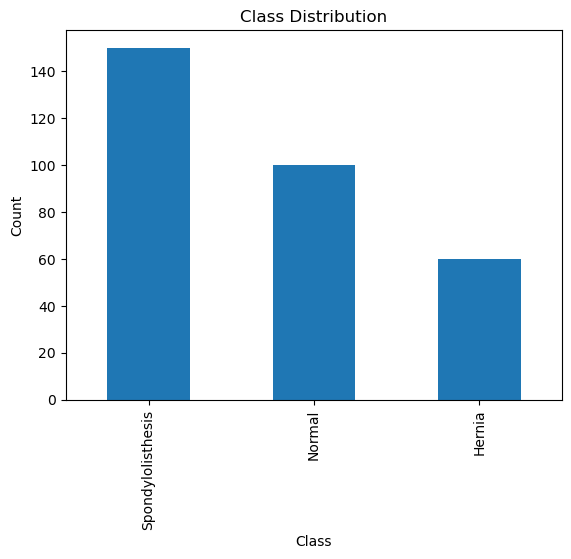

In [12]:
import matplotlib.pyplot as plt
print(df["class"].value_counts()) 

df["class"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


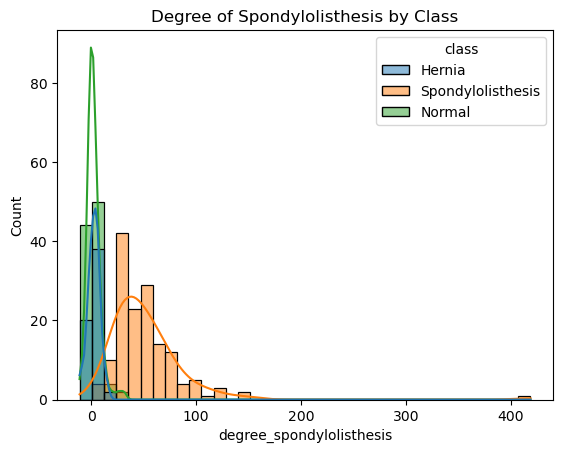

In [9]:
import seaborn as sns

sns.histplot(data=df, x="degree_spondylolisthesis", hue="class", kde=True)
plt.title("Degree of Spondylolisthesis by Class")
plt.show()


The histogram "Degree of Spondylolisthesis by Class" illustrates distinct patterns for each class. 'Normal' cases are heavily concentrated at very low 'degree_spondylolisthesis' values, peaking sharply near zero. In contrast, 'Hernia' cases also show a peak near zero but with a broader spread. 'Spondylolisthesis' cases exhibit a wider distribution, with values generally higher than 'Normal' and 'Hernia', indicating a strong association between elevated 'degree_spondylolisthesis' and this specific spinal condition.

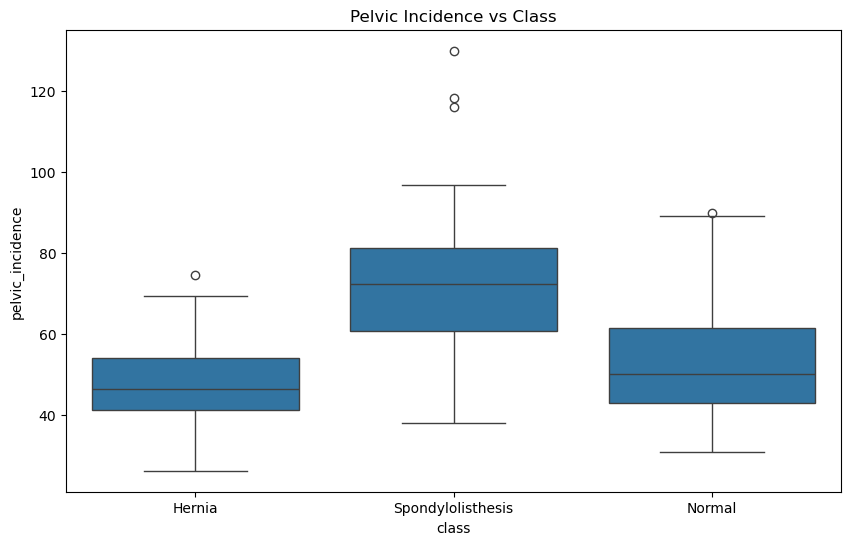

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="pelvic_incidence")
plt.title("Pelvic Incidence vs Class")
plt.show()


The box plot "Pelvic Incidence vs Class" reveals distinct distributions for each spinal condition:
Hernia: Shows a relatively lower median pelvic incidence, with a narrower interquartile range, suggesting that 'Hernia' cases tend to have lower pelvic incidence values compared to the other classes.
Spondylolisthesis: Exhibits a significantly higher median pelvic incidence and a wider interquartile range, indicating that this condition is associated with considerably higher and more varied pelvic incidence values. There are also a few outliers with very high pelvic incidence.
Normal: Displays a median pelvic incidence that falls between 'Hernia' and 'Spondylolisthesis', with a moderate spread.
Overall, the plot suggests that 'pelvic_incidence' is a differentiating factor among the classes, with 'Spondylolisthesis' cases generally having the highest values, and 'Hernia' cases having the lowest.

### Correlation Heatmap

Which features are related to each other?

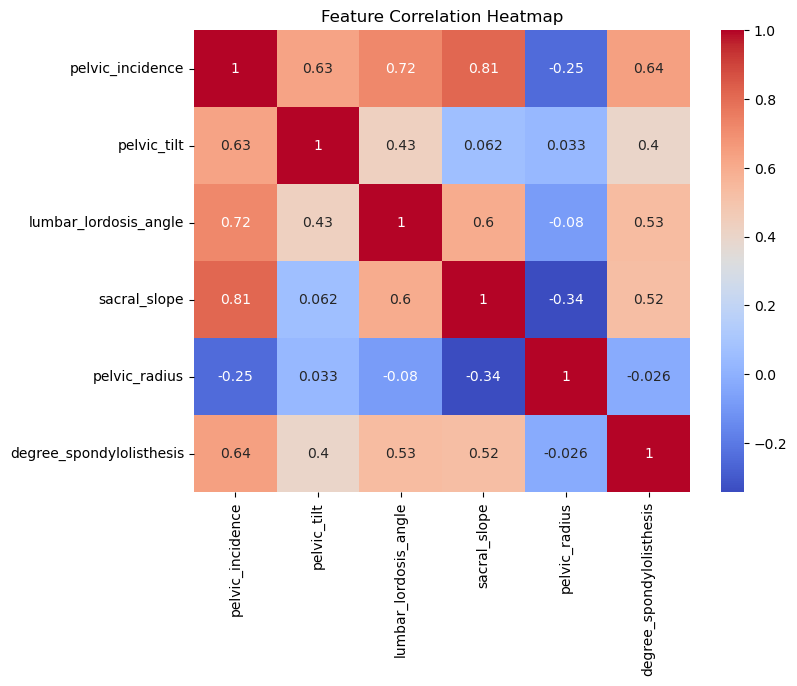

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.drop(columns=["class"]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


The "Feature Correlation Heatmap" illustrates the linear relationships between various spinal parameters:
Strong Positive Correlations: There are notably strong positive correlations between pelvic_incidence and sacral_slope (0.81), lumbar_lordosis_angle (0.72), and degree_spondylolisthesis (0.64). Similarly, sacral_slope shows high positive correlations with pelvic_incidence (0.81) and lumbar_lordosis_angle (0.6). These strong positive values suggest that as one of these parameters increases, the other tends to increase as well.
Moderate Positive Correlations: pelvic_tilt numeric shows moderate positive correlations with pelvic_incidence (0.63) and lumbar_lordosis_angle (0.43). degree_spondylolisthesis also has moderate positive correlations with pelvic_incidence (0.64), lumbar_lordosis_angle (0.53), and sacral_slope (0.52).
Negative Correlations: pelvic_radius exhibits negative correlations with most other features, particularly with sacral_slope (-0.34) and pelvic_incidence (-0.25). This suggests an inverse relationship where an increase in pelvic_radius might be associated with a decrease in these other parameters, although the strength of these negative correlations is generally weaker than the strong positive ones observed.
Overall, the heatmap highlights significant interdependencies among several spinal measurements, which can be crucial for understanding spinal biomechanics and disorders.The heatmap reveals strong positive correlations among 'pelvic_incidence', 'lumbar_lordosis_angle', 'sacral_slope', and 'degree_spondylolisthesis'. Notably, 'pelvic_incidence' and 'sacral_slope' are highly correlated (0.81). 'pelvic_radius' shows a weak negative correlation with most other features, especially 'sacral_slope' (-0.34). This suggests significant multicollinearity among several features, particularly those related to pelvic and spinal alignment.

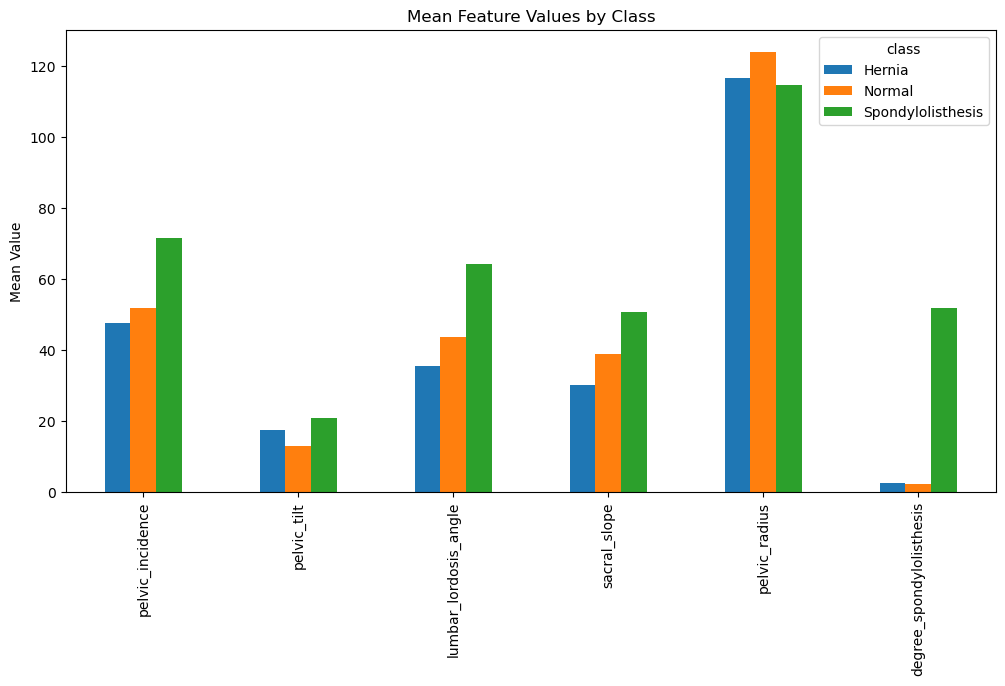

In [17]:
df.groupby("class").mean().T.plot(kind="bar", figsize=(12,6))
plt.title("Mean Feature Values by Class")
plt.ylabel("Mean Value")
plt.show()


The "Mean Feature Values by Class" bar plot highlights how the average values of different spinal features vary across the 'Hernia', 'Normal', and 'Spondylolisthesis' classes:
pelvic_incidence: 'Spondylolisthesis' shows the highest mean pelvic_incidence, followed by 'Normal' and then 'Hernia'. This suggests pelvic_incidence is a key differentiator, with higher values strongly linked to 'Spondylolisthesis'.
pelvic_tilt: 'Spondylolisthesis' has the highest mean pelvic_tilt, while 'Normal' has the lowest.
lumbar_lordosis_angle: Similar to pelvic_incidence, 'Spondylolisthesis' exhibits the highest mean lumbar_lordosis_angle, with 'Hernia' having the lowest.
sacral_slope: Again, 'Spondylolisthesis' displays the highest mean sacral_slope, with 'Hernia' having the lowest.
pelvic_radius: Interestingly, 'Hernia' has the highest mean pelvic_radius, followed closely by 'Normal' and then 'Spondylolisthesis'. This indicates an inverse pattern compared to most other features.
degree_spondylolisthesis: This feature shows the most dramatic difference, with 'Spondylolisthesis' having a significantly higher mean value compared to 'Hernia' and 'Normal', which are both very low. This strongly confirms degree_spondylolisthesis as a primary indicator for the 'Spondylolisthesis' class.
In summary, 'Spondylolisthesis' cases are generally characterized by higher mean values across pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, and especially degree_spondylolisthesis. 'Hernia' cases often show the lowest mean values for most of these features, while 'Normal' cases fall in between, except for pelvic_radius where 'Hernia' has the highest mean.

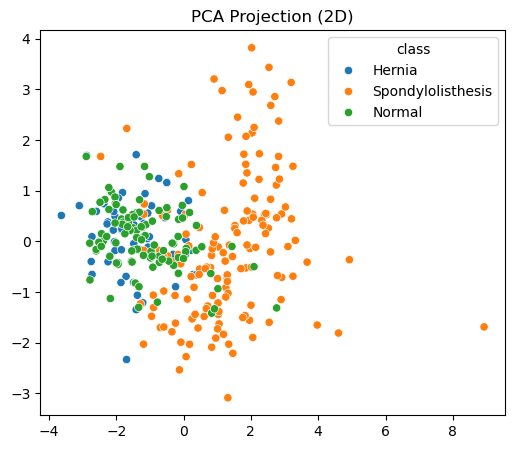

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns=["class"])
y = df["class"]

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)
plt.title("PCA Projection (2D)")
plt.show()


The "PCA Projection (2D)" plot displays the data reduced to two principal components, with points colored according to their spinal class:
'Spondylolisthesis' (orange points): These points appear to form a relatively distinct cluster, primarily located in the positive region of both PCA dimensions (upper right quadrant). This suggests that 'Spondylolisthesis' cases have a different underlying structure in the data that separates them from the other classes in this 2D projection. There's some overlap with the other classes, particularly around the origin.
'Hernia' (blue points): These points are more scattered, showing some overlap with 'Normal' cases, especially in the central-left region of the plot. There's no clear, tightly defined cluster for 'Hernia' that is entirely separate from 'Normal'.
'Normal' (green points): Similar to 'Hernia', 'Normal' cases are also somewhat scattered and intermingled with 'Hernia' points in the central-left area.
In summary, the PCA projection indicates a reasonable separation of 'Spondylolisthesis' cases from the 'Hernia' and 'Normal' classes. However, 'Hernia' and 'Normal' cases show considerable overlap, suggesting that distinguishing between these two classes might be more challenging based solely on these two principal components. This implies that while PCA helps visualize some class differences, more advanced classification techniques or additional features might be needed for a clearer distinction between 'Hernia' and 'Normal'.

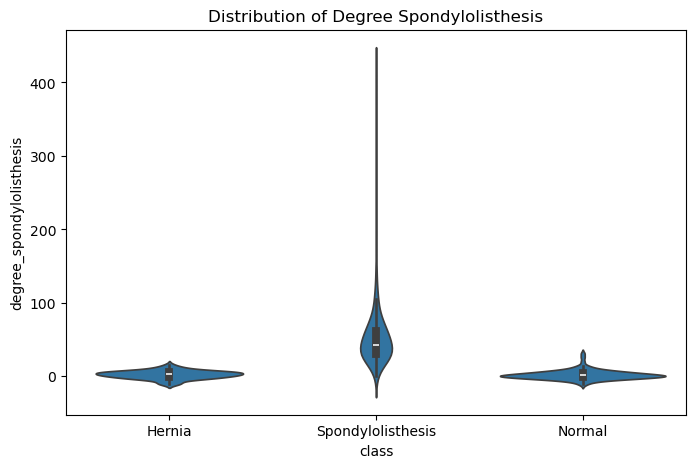

In [19]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="class", y="degree_spondylolisthesis")
plt.title("Distribution of Degree Spondylolisthesis")
plt.show()


The violin plot titled "Distribution of Degree Spondylolisthesis" clearly illustrates the distinct distribution of degree_spondylolisthesis values across the three classes:
Hernia: The distribution for 'Hernia' is very narrow and heavily concentrated around zero, indicating that individuals in this class typically have very low values for degree_spondylolisthesis.
Spondylolisthesis: This class shows a markedly different distribution. The violin plot is much wider and extends to very high values, suggesting a broad range of degree_spondylolisthesis values. The bulk of the data for 'Spondylolisthesis' is centered around higher values compared to the other two classes, with a significant spread and several extreme values, highlighting its strong association with elevated degree_spondylolisthesis.
Normal: Similar to 'Hernia', the 'Normal' class also exhibits a very narrow distribution concentrated near zero, signifying that healthy spines generally have very low degree_spondylolisthesis.
In conclusion, the degree_spondylolisthesis feature is a powerful discriminator, with 'Spondylolisthesis' cases showing uniquely high and widely distributed values, while 'Hernia' and 'Normal' cases are predominantly clustered at the lower end of the spectrum.